<h1><center><font size="6">Movie recommendation systems for the MovieLens dataset</font></center></h1>

**By Team_TS5_JHB**

# <a id='0'>Contents</a>


* [1. Introduction](#introduction)
    * [1.1. Project overview](#Project_overview)
    * [1.2. Project objective](#Project_objective)
* [2. Comet Experiment](#Start_Comet_Experiment)
* [3. Package and Module Imports](#Package_and_module_imports)
* [4. Data Description](#Data_Description)
* [5. Load and View Data](#Load_and_view_data)
* [6. Data Cleaning](#Data_Cleaning)
    * [6.1. Missing Values](#Missing_Values)
    * [6.2. Normalizing and Combining Data](#Normalizing_and_Combining_Data)
* [7. Exploratory Data Analysis](#Exploratory_Data_Analysis)
    * [7.1. All time Porpular Movies by Ratings (Top 20)](#popular_movies)
    * [7.2. Latest Porpular Movies by Ratings (Top 20) from 2010 till to date](#latest_popular)
    * [7.3. Release Year for Movies](#release_year)
    * [7.4. Popular Genres](#popular_genres)
    * [7.5. Popular Cast](#popular_cast)
    * [7.6. Ratings distribution](#ratings_distribution)
    * [7.7. Distribution of Movies' Duration](#distribution_of_duration)
    * [7.8. Most Popular words used in titles](#popular_words)
    * [7.9. Top 10 Movie Directors](#movie_directors)
    * [7.10. Average Rating per Genre](#average_rating_per_genre)
    * [7.11. Cast with highest ratings](#Cast_highest_ratings)
    * [7.12. Average runtime per genre](#average_runtime_per_genre)
    * [7.13. Average budget per genre](#average_budget_per_genre)
    * [7.14. Average rating per genre over years](#rating_per_genre_oty)
* [8. Feature Engineering](#feature_engineering)
    * [8.1. Vectorization](#vectorization)
    * [8.2. Measuring Similarity](#similarity)
* [9. Recommenders](#recommenders)
    * [9.1. Content Filtering-Based Recommender System](#content_based)
    * [9.2. Collaborative Filtering-Based Recommender System](#collaborative_based)
* [10. Submission](#submission) 
* [11. Conclusion](#conclusion)
* [12. End Comet Experiment](#ecomet)
* [13. References](#ref)
 

<a id="introduction"></a>
# <a id="1">1. Introduction</a>  


## 1.1. Project overview<a id="Project_overview"></a>

The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play. Recommendation Systems are a type of information filtering systems as they improve the quality of search results and they are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with daily. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options. Recommendation algorithms are at the core of many service providers strategies. The importance of a recommender system cannot be stressed enough. The financial benefits are enormous and almost every major tech company has applied them in some form or the other: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow.
    




## 1.2. Project objective<a id="Project_objective"></a>

EDSA is challenging us to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

In this kernel, we build a movie recommendation system utilizing the **MovieLens dataset**. A typical scenario of where you will need our system is that of a **Friday** night while having a nice cup of wine, some snacks sitting comfortably in your lounge,or bed, all alone, or with some company. An almost perfect night, except that you don't have the perfect movie.

Now you wish you had gone out, but you can't since there is still **Covid-19** and you are **locked-down**. You turn to our movie recommender and you recall you enjoyed a movie called **The heart of Christmas** and then boom: 

![recommended movie?](https://alvinalexander.com/sites/default/files/2017-09/netflix-christmas-movie-suggestions.jpg)*You may like these?*

# <a id="1">2. Comet Experiment</a><a id="Start_Comet_Experiment"></a>

Comet is a cloud-based platform that allows teams to preserve and compare the different models that have been built during a project. It is an effective tool for version control. We have saved all of our models as Comet experiments.

In [1]:
!pip install comet_ml
# import comet_ml in the top of your file
from comet_ml import Experiment

In [2]:
# Add the following code anywhere in your machine learning file
experiment = Experiment(api_key="6vpFFTelpkQzltqaT42izXgde",
                        project_name="unsupervised-learning-predict", workspace="team-ts5-jhb")

COMET INFO: old comet version (3.1.10) detected. current: 3.1.14 please update your comet lib with command: `pip install --no-cache-dir --upgrade comet_ml`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/team-ts5-jhb/unsupervised-learning-predict/1fee01dc2d0a4c2fa5d218782e01c77a



# <a id="1">3. Package and Module Imports</a><a id="Package_and_module_imports"></a>

In [3]:
# Data Wrangling
import numpy as np 
import pandas as pd 

# Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("darkgrid")
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
py.init_notebook_mode(connected = True)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import squarify

#Evaluation and model building libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Surprise Library
from surprise import Reader, Dataset, SVD
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import SlopeOne
from surprise.accuracy import rmse
from surprise.model_selection import cross_validate

# other libraries
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display_html 
from IPython.core.display import HTML
from collections import defaultdict
import datetime
import re



# <a id="1">4. Data Description</a><a id="Data_Description"></a>

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data and resampled for fair evaluation purposes.

### Supplied Files
* genome_scores.csv - A score mapping the strength between movies and tag-related properties.
* genome_tags.csv - User assigned tags for genome-related scores.
* imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
* links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
* sample_submission.csv - Sample of the submission format for the hackathon.
* tags.csv - User assigned for the movies within the dataset.
* test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
* train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

### Additional Information
The below information is provided directly from the MovieLens dataset description files:

### Ratings Data File Structure (train.csv)
All ratings are contained in the file train.csv. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:

`userId,movieId,rating,timestamp`

The lines within this file are ordered first by userId, then, within the user, by movieId.

Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

### Tags Data File Structure (tags.csv)
All tags are contained in the file tags.csv. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format:

`userId,movieId,tag,timestamp`

The lines within this file are ordered first by userId, then, within the user, by movieId.

Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag are determined by each user.

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

### Movies Data File Structure (movies.csv)
Movie information is contained in the file movies.csv. Each line of this file after the header row represents one movie, and has the following format:

`movieId,title,genres`

Movie titles are entered manually or imported from https://www.themoviedb.org/ and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

Genres are a pipe-separated list, and are selected from the following:

Action
Adventure
Animation
Children's
Comedy
Crime
Documentary
Drama
Fantasy
Film-Noir
Horror
Musical
Mystery
Romance
Sci-Fi
Thriller
War
Western
(no genres listed)

### Links Data File Structure (links.csv)
Identifiers that can be used to link to other sources of movie data are contained in the file links.csv. Each line of this file after the header row represents one movie, and has the following format:

`movieId,imdbId,tmdbId`

movieId is an identifier for movies used by https://movielens.org. E.g., the movie Toy Story has the link https://movielens.org/movies/1.

imdbId is an identifier for movies used by http://www.imdb.com. E.g., the movie Toy Story has the link http://www.imdb.com/title/tt0114709/.

tmdbId is an identifier for movies used by https://www.themoviedb.org. E.g., the movie Toy Story has the link https://www.themoviedb.org/movie/862.

Use of the resources listed above is subject to the terms of each provider.

### Tag Genome (genome-scores.csv and genome-tags.csv)
As described in this article, the tag genome encodes how strongly movies exhibit particular properties represented by tags (atmospheric, thought-provoking, realistic, etc.). The tag genome was computed using a machine learning algorithm on user-contributed content including tags, ratings, and textual reviews.

The genome is split into two files. The file genome-scores.csv contains movie-tag relevance data in the following format:

`movieId,tagId,relevance`

The second file, genome-tags.csv, provides the tag descriptions for the tag IDs in the genome file, in the following format:

`tagId,tag`

# <a id="1">5. Load and View data</a><a id="Load_and_view_data"></a>

In [4]:
#Reading all the given data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
links_df = pd.read_csv('links.csv')
movies_df = pd.read_csv('movies.csv')
imdb_df = pd.read_csv('imdb_data.csv')
tags_df = pd.read_csv('tags.csv')
genome_tags_df = pd.read_csv('genome_tags.csv')
genome_scores_df = pd.read_csv('genome_scores.csv')
sample_submission_df = pd.read_csv('sample_submission.csv')

Below is the function that will help us to overview our data in one cell.

In [5]:
#Function to display all data
def data_overview_display(dataframe_list,column_names=[]):
    """
    Displays multiple dataframes in one cell.

    Parameter(s):
    -------------
    dataframe_list(DataFrame(s)): an input of dataframe(s) as list.
    column_names(string): list of string.
    
    Return
    ------
    display_html(DataFrame(s)): returns multiple of dataframes in one cell.
    
    """
    html_string = ''
    html_string += ('<tr>' + ''.join(f'<td style="text-align:center">{name}</td>' for name in column_names) + '</tr>')
    html_string += ('<tr>' + ''.join(f'<td style="vertical-align:top"> {df.to_html(index=True)}</td>' for df in dataframe_list) + '</tr>')
    html_string = f'<table>{html_string}</table>'
    html_string = html_string.replace('table','table style="display:inline"')
    display_html(html_string, raw=True)  

In [6]:
#Generate the overview
data_overview_display([train_df.head(),test_df.head(),links_df.head(),tags_df.head()], column_names=['Train df','Test df','Links df','Tags df'])

Train df Test df Links df Tags df 
 
 
 
 userId 
 movieId 
 rating 
 timestamp 
 
 
 
 
 0 
 5163 
 57669 
 4.0 
 1518349992 
 
 
 1 
 106343 
 5 
 4.5 
 1206238739 
 
 
 2 
 146790 
 5459 
 5.0 
 1076215539 
 
 
 3 
 106362 
 32296 
 2.0 
 1423042565 
 
 
 4 
 9041 
 366 
 3.0 
 833375837 
 
 
 
 
 
 
 userId 
 movieId 
 
 
 
 
 0 
 1 
 2011 
 
 
 1 
 1 
 4144 
 
 
 2 
 1 
 5767 
 
 
 3 
 1 
 6711 
 
 
 4 
 1 
 7318 
 
 
 
 
 
 
 movieId 
 imdbId 
 tmdbId 
 
 
 
 
 0 
 1 
 114709 
 862.0 
 
 
 1 
 2 
 113497 
 8844.0 
 
 
 2 
 3 
 113228 
 15602.0 
 
 
 3 
 4 
 114885 
 31357.0 
 
 
 4 
 5 
 113041 
 11862.0 
 
 
 
 
 
 
 userId 
 movieId 
 tag 
 timestamp 
 
 
 
 
 0 
 3 
 260 
 classic 
 1439472355 
 
 
 1 
 3 
 260 
 sci-fi 
 1439472256 
 
 
 2 
 4 
 1732 
 dark comedy 
 1573943598 
 
 
 3 
 4 
 1732 
 great dialogue 
 1573943604 
 
 
 4 
 4 
 7569 
 so bad it's good 
 1573943455

In [7]:
#Generate the overview
data_overview_display([movies_df.head(),genome_tags_df.head(),genome_scores_df.head()], column_names=['Movies dataframe','genome tags df','genome scores df'])

Movies dataframe genome tags df genome scores df 
 
 
 
 movieId 
 title 
 genres 
 
 
 
 
 0 
 1 
 Toy Story (1995) 
 Adventure|Animation|Children|Comedy|Fantasy 
 
 
 1 
 2 
 Jumanji (1995) 
 Adventure|Children|Fantasy 
 
 
 2 
 3 
 Grumpier Old Men (1995) 
 Comedy|Romance 
 
 
 3 
 4 
 Waiting to Exhale (1995) 
 Comedy|Drama|Romance 
 
 
 4 
 5 
 Father of the Bride Part II (1995) 
 Comedy 
 
 
 
 
 
 
 tagId 
 tag 
 
 
 
 
 0 
 1 
 007 
 
 
 1 
 2 
 007 (series) 
 
 
 2 
 3 
 18th century 
 
 
 3 
 4 
 1920s 
 
 
 4 
 5 
 1930s 
 
 
 
 
 
 
 movieId 
 tagId 
 relevance 
 
 
 
 
 0 
 1 
 1 
 0.02875 
 
 
 1 
 1 
 2 
 0.02375 
 
 
 2 
 1 
 3 
 0.06250 
 
 
 3 
 1 
 4 
 0.07575 
 
 
 4 
 1 
 5 
 0.14075

In [8]:
#Show "imdb_df" dataframe
imdb_df.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


# <a id="1">6. Data Cleaning</a><a id="Data_Cleaning"></a>


## 6.1. Missing Values<a id="Missing_Values"></a>

In this section , we will be checking null values from each dataframe and decide on how are we going to deal with the null values.

In [9]:
#Create the null values dataframes of all the given data
train_null = pd.DataFrame({"Null Values":train_df.isnull().sum()})
test_null = pd.DataFrame({"Null Values":test_df.isnull().sum()})
movies_null = pd.DataFrame({"Null Values":movies_df.isnull().sum()})
links_null = pd.DataFrame({"Null Values":links_df.isnull().sum()})
imdb_null = pd.DataFrame({"Null Values":imdb_df.isnull().sum()})
tags_null = pd.DataFrame({"Null Values":tags_df.isnull().sum()})
genome_tags_null = pd.DataFrame({"Null Values":genome_tags_df.isnull().sum()})
genome_scores_null = pd.DataFrame({"Null Values":genome_scores_df.isnull().sum()})

In [10]:
#Generate overview of null values of dataframes
data_overview_display([train_null,test_null,movies_null,links_null,genome_scores_null,tags_null,genome_tags_null], column_names=['Train df','Test df','Movies df', 'Links df','genome scores df','tags df','genome tags'])

Train df Test df Movies df Links df genome scores df tags df genome tags 
 
 
 
 Null Values 
 
 
 
 
 userId 
 0 
 
 
 movieId 
 0 
 
 
 rating 
 0 
 
 
 timestamp 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 userId 
 0 
 
 
 movieId 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 movieId 
 0 
 
 
 title 
 0 
 
 
 genres 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 movieId 
 0 
 
 
 imdbId 
 0 
 
 
 tmdbId 
 107 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 movieId 
 0 
 
 
 tagId 
 0 
 
 
 relevance 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 userId 
 0 
 
 
 movieId 
 0 
 
 
 tag 
 16 
 
 
 timestamp 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 tagId 
 0 
 
 
 tag 
 0

In [11]:
#Generate overview null value of "imdb_df"
data_overview_display([imdb_null], column_names=['imdb df'])

imdb df 
 
 
 
 Null Values 
 
 
 
 
 movieId 
 0 
 
 
 title_cast 
 10068 
 
 
 director 
 9874 
 
 
 runtime 
 12089 
 
 
 budget 
 19372 
 
 
 plot_keywords 
 11078

In [12]:
print ("As seen from the above, the imdb df has more than: ", round((imdb_null.loc['budget'][0]/len(imdb_df))*100,2),"% of the missing data, so it is not advisable to deleting null rows")

As seen from the above, the imdb df has more than:  71.02 % of the missing data, so it is not advisable to deleting null rows


## 6.2. Normalizing and Combining Data<a id="Normalizing_and_Combining_Data"></a>

Below we will extract the released year from title e.g title "Toy Story (1995)" and the released year will be 1995. Also, we will split the genres into a list and concatenate the rating column from the train_df dataframe with the movies dataframe.


In [13]:
#extracting released year
movies_df['release_year']=movies_df['title'].str[-5:-1] 
#spliting the genres into a list
movies_df['genres']=movies_df['genres'].str.split('|') 
#concatinate ratings with movies dataframe
movies_df=pd.concat([movies_df,train_df['rating']],axis=1).dropna() 
movies_df.head()

,movieId,title,genres,release_year,rating
0,1.0,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,4.0
1,2.0,Jumanji (1995),"[Adventure, Children, Fantasy]",1995,4.5
2,3.0,Grumpier Old Men (1995),"[Comedy, Romance]",1995,5.0
3,4.0,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995,2.0
4,5.0,Father of the Bride Part II (1995),[Comedy],1995,3.0


Below we will split the title cast and keywords into different lists.

In [14]:
#spliting the title cast into a list
imdb_df['title_cast']=imdb_df['title_cast'].str.split('|') 
#spliting the Key words into a list
imdb_df['plot_keywords']=imdb_df['plot_keywords'].str.split('|') 
imdb_df.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000","[toy, rivalry, cowboy, cgi animation]"
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,104.0,"$65,000,000","[board game, adventurer, fight, game]"
2,3,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,101.0,"$25,000,000","[boat, lake, neighbor, rivalry]"
3,4,"[Whitney Houston, Angela Bassett, Loretta Devi...",Terry McMillan,124.0,"$16,000,000","[black american, husband wife relationship, be..."
4,5,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,106.0,"$30,000,000","[fatherhood, doberman, dog, mansion]"


# <a id="1">7. Exploratory Data Analysis</a><a id="Exploratory_Data_Analysis"></a>

## 7.1. All time Popular Movies by ratings (Top 20)<a id="popular_movies"></a>

In [15]:
#Below is the function that extract porpular movies

def extract_popular_movies(df1,df2):
    """
    Retruns porpular movies from based on avarage ratings and total ratings count.

    Parameters
    ----------
    df1: DataFrame from train_df.
    df2: DataFrame from movies_df.
    
    Return
    ------
    Porpular_movies(DataFrame): returns dataframe of porpular movies.
    
    Example
    -------
    >>> train = pd.read_csv('train.csv')
    >>> movie = pd.read_csv('train.csv')
    
    >>> extract_popular_movies(train, movie).head(2)
    
    -----------------------------------------------
           title| rating|rating_counts|release_year
    -----------------------------------------------
    0 |abc(2001)| 3.2341|        2435 |       2001
    1 |def(2002)| 5.2343|        534  |       2002    
      
    """
    #Calculating the avarage rating and storing the results as a DataFrame
    rating = pd.DataFrame(df1.groupby('movieId')['rating'].mean())
    #Calculating the total ratings count and storing the results as a DataFrame
    rating['ratings_count'] = pd.DataFrame(df1.groupby('movieId')['rating'].count())
    rating=rating.sort_values(by=['ratings_count','ratings_count'],ascending=False).reset_index()
    
    #Joining the Two DataFrames
    inner_join = pd.merge(rating,df2,on ='movieId',how ='inner')
    popular_movies=inner_join[['title','rating_x','ratings_count','release_year']].rename(columns={"rating_x": "rating"})
    
    return popular_movies

In [16]:
#Show the extracted porpular movies
extract_popular_movies(train_df,movies_df).head()

,title,rating,ratings_count,release_year
0,"Shawshank Redemption, The (1994)",4.417624,32831,1994
1,Forrest Gump (1994),4.047216,32383,1994
2,Pulp Fiction (1994),4.195097,31697,1994
3,"Silence of the Lambs, The (1991)",4.144172,29444,1991
4,"Matrix, The (1999)",4.154253,29014,1999


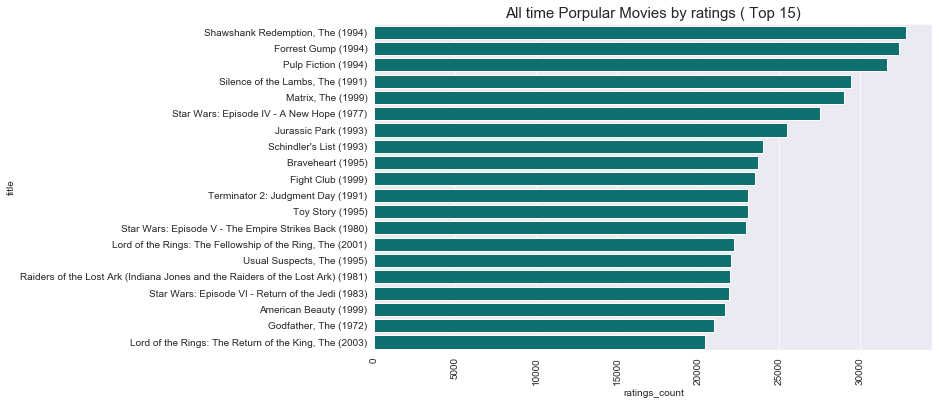

In [17]:
#Create the variable "data"
data=extract_popular_movies(train_df,movies_df)

#Plotting porpular movies using bar-plots
plt.figure(figsize = (10,6))
ax=sns.barplot(y='title', x='ratings_count', data=data.head(20),color='teal')
ax.set_title('All time Porpular Movies by ratings ( Top 15)',fontsize=15)
plt.xticks(rotation=90)
plt.show()

From the above plot, we observe that the based on average rating and the total count of ratings, the movie **Shawshank Redemption, The (1994)** had the most **rating counts of 32831** and **average rating of 4.41** when we considered top-rated movies from all time.

## 7.2. Latest Popular Movies by ratings (Top 20) from 2010 till to date<a id="latest_popular"></a>

In [18]:
#Create the variable "data"
data=extract_popular_movies(train_df,movies_df)

#Extracting latest movies from 2010 till to date
latest_movies=data[data['release_year']>'2010'][['rating','ratings_count','title']]

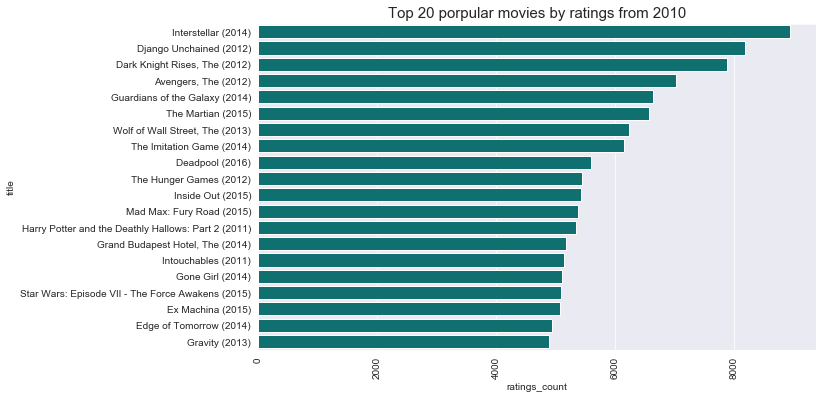

In [19]:
#Plotting the latest movies from 2010 using bar-plots
plt.figure(figsize = (10,6))
ax=sns.barplot(y='title', x='ratings_count', data=latest_movies.head(20),color='teal')
ax.set_title('Top 20 porpular movies by ratings from 2010',fontsize=15)
plt.xticks(rotation=90)
plt.show()

From the above plot, we observe that the based on average rating and the total count of ratings, the movie Interstellar (2014) had the most **rating counts of 8937** and **average rating of 4.08** when we considered movies from 2010 till to date.

## 7.3. Release Year for Movies<a id="release_year"></a>

Below we will be showing total counts of movies released on each year based on our database.

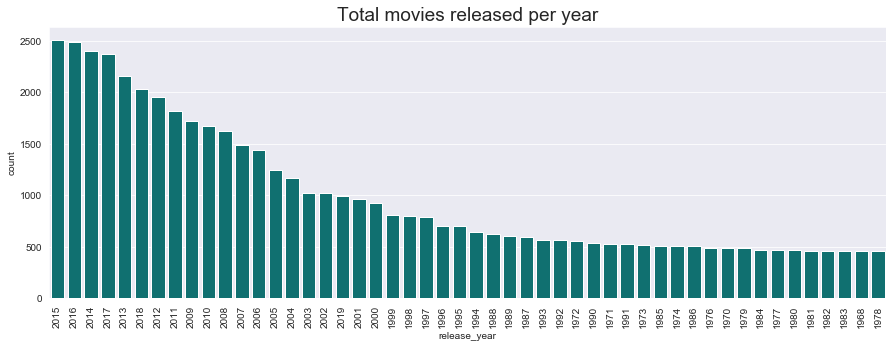

In [20]:
#Plotting total counts of movies released on each year using count-plot.
fig, ax = plt.subplots(figsize=(15, 5))
ax=sns.countplot(x=movies_df['release_year'], order = movies_df['release_year'].value_counts()[0:50].index,color='teal')
ax.set_title('Total movies released per year',fontsize=19)
plt.xticks(rotation=90)
plt.show()

From the above, we can observe that 2015 was the year with most released movies per our database.

## 7.4. Popular Genres<a id="popular_genres"></a>

Below we will be showing the popular genre amongst the movies.

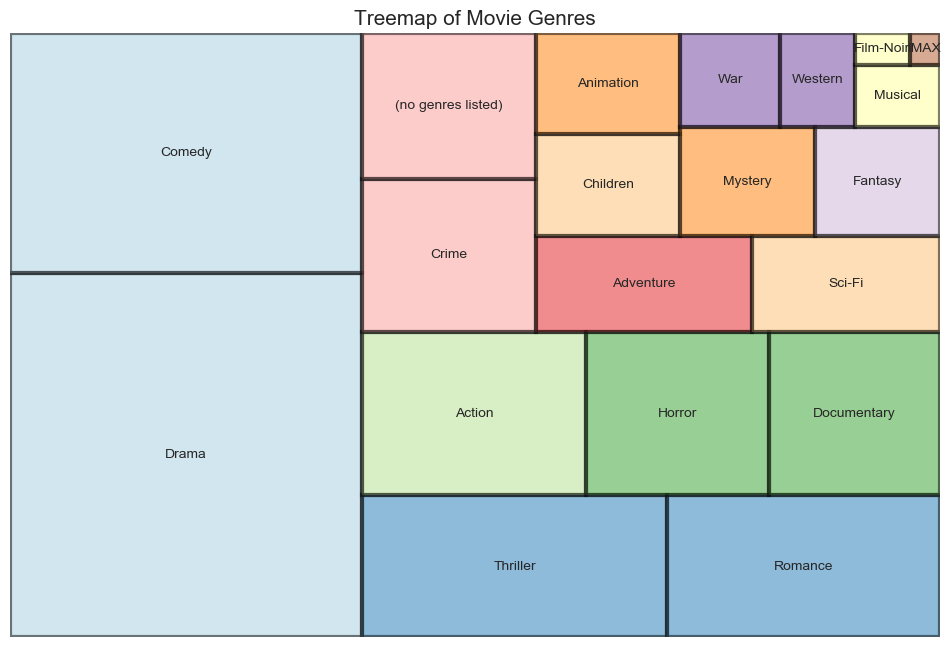

In [21]:
#Create variable "temp_df"
temp_df = movies_df['genres'].explode().value_counts().reset_index()

#Plotting popular genres using Treemap
sizes=np.array(temp_df['genres'])
labels=temp_df['index']
colors = [plt.cm.Paired(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize=(12,8), dpi= 100)
squarify.plot(sizes=sizes, label=labels, color = colors, alpha=.5, edgecolor="black", linewidth=3, text_kwargs={'fontsize':10})
plt.title('Treemap of Movie Genres', fontsize = 15)
plt.axis('off')
plt.show()

Observation: Drama was the most popular genre amongst the movies.

## 7.5. Popular Cast<a id="popular_cast"></a>

Below we will be showing the popular cast amongst the movies.

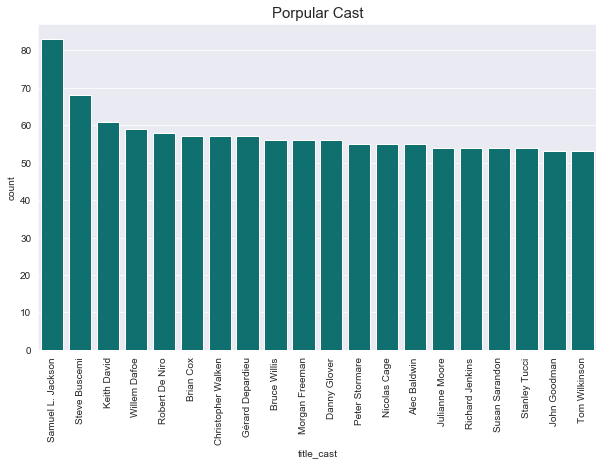

In [22]:
#Plotting popular cast using count-plot
plt.figure(figsize = (10,6))
title_cast=imdb_df['title_cast'].explode()
ax=sns.countplot(x=title_cast, order = title_cast.value_counts().index[:20],color='teal')
ax.set_title('Porpular Cast',fontsize=15)
plt.xticks(rotation=90)
plt.show()

**Observation**: Samuel L Jackson was the popular cast as he appeared in over 80 movies from our database.

## 7.6. Ratings Distribution<a id="ratings_distribution"></a>

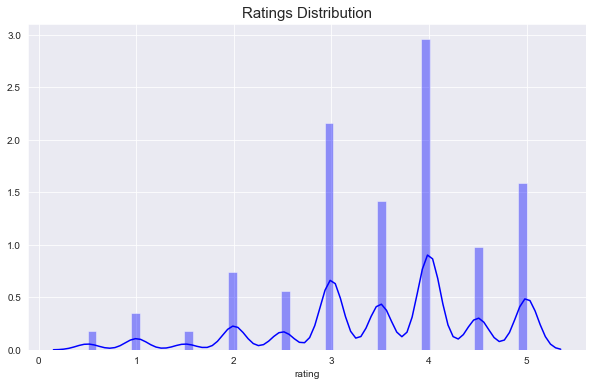

In [23]:
#Plotting Rating distribution of observations using dist-plot
plt.figure(figsize = (10,6))
ax=sns.distplot(movies_df['rating'],color='blue')
ax.set_title('Ratings Distribution',fontsize=15)
plt.show()

**Observation**: Most Movies had a rating of over 4.

## 7.7. Distribution of Movies' duration<a id="distribution_of_duration"></a>

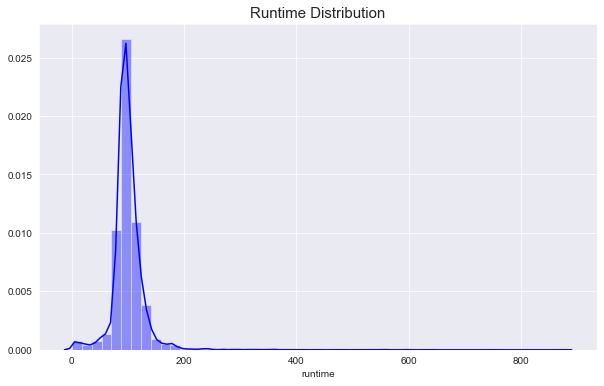

In [24]:
#Plotting movies's duration distribution using dist-plot
plt.figure(figsize = (10,6))
ax=sns.distplot(imdb_df['runtime'],color='blue')
ax.set_title('Runtime Distribution',fontsize=15)
plt.show()

## 7.8. Most Popular Words Used in Movie Titles<a id="popular_words"></a>

A word-cloud will be utilized for this visualization. A word cloud is an image that visualises words that are associated with a certain topic, or rather in this case a sentiment class(es). The font size of the word indicates the frequency that that particular word occurs at. The bigger the font size, the more frequent the word features.

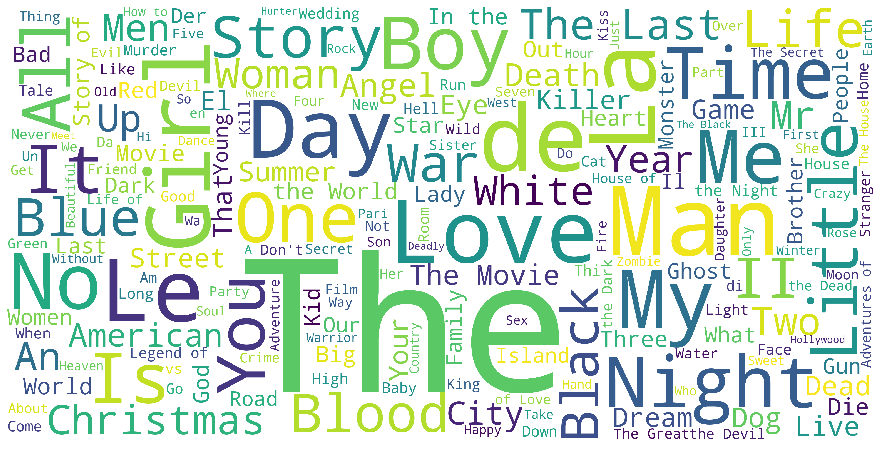

In [25]:
# Create a wordcloud of the movie titles
movies_df['title'] = movies_df['title'].fillna("").astype('str')
title_corpus = ' '.join(movies_df['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)

# Plotting wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

## 7.9. Top 10 Movie Directors<a id="movie_directors"></a>

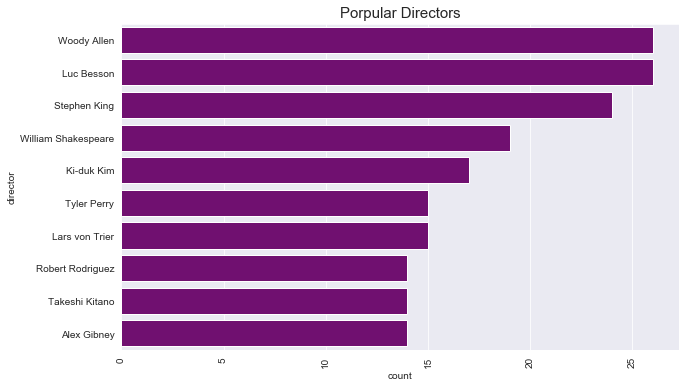

In [26]:
#Plotting top 10 movie directors using count-plot
plt.figure(figsize = (10,6))
director=imdb_df['director']#.explode()
ax=sns.countplot(y=director, order = director.value_counts().index[1:11],color='purple')
ax.set_title('Porpular Directors',fontsize=15)
plt.xticks(rotation=90)
plt.show()

## 7.10. Average Rating per Genre<a id="average_rating_per_genre"></a>

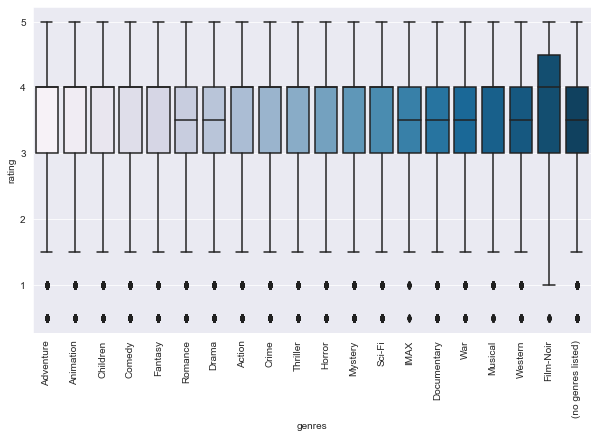

In [27]:
#Plotting the average rating per genre using box-plot
plt.figure(figsize=(10,6))
genre_rating=movies_df[['rating','genres']].explode('genres')
sns.boxplot(x="genres", y="rating", data=genre_rating,palette="PuBu")
plt.xticks(rotation=90)
plt.show()

**Observation**: Most Movies with genre **Film-Noir** had the highest ratings amongst all genres.

## 7.11. Cast With Highest Ratings<a id="Cast_highest_ratings"></a>

In [28]:
#Merging the imdb_df and movies_df
movies_imdb_df = pd.merge(imdb_df,movies_df,on ='movieId',how ='inner')

In [29]:
#Function that returns casts with highest ratings
def cast_rating(df,casts,rating):
    """
    Returns a list of cast with high rating.

    Parameters
    -----------
    df(DataFrame): input a dataframe. 
    casts(str): column name as a string from the dataframe that contains cast names.
    rating(str): Column name as string from dataframe that contains ratings.
    
    Return
    ------
    cast_rating(DataFrame): a dataframe of cast rating using aggregation of "mean" and "count". 
    
    """
    cast_rating=df[[casts,rating]].explode(casts)
    cast_rating=cast_rating.groupby(casts)[rating].agg(['mean','count']).sort_values(['count'], ascending= False)
    cast_rating=cast_rating.reset_index()
    
    return cast_rating

In [30]:
#Showing the implementation
data=cast_rating(movies_imdb_df,'title_cast','rating')
data.head()

,title_cast,mean,count
0,Samuel L. Jackson,3.620253,79
1,Steve Buscemi,3.700000,65
2,Robert De Niro,3.342105,57
3,Nicolas Cage,3.500000,55
4,Gérard Depardieu,3.527273,55


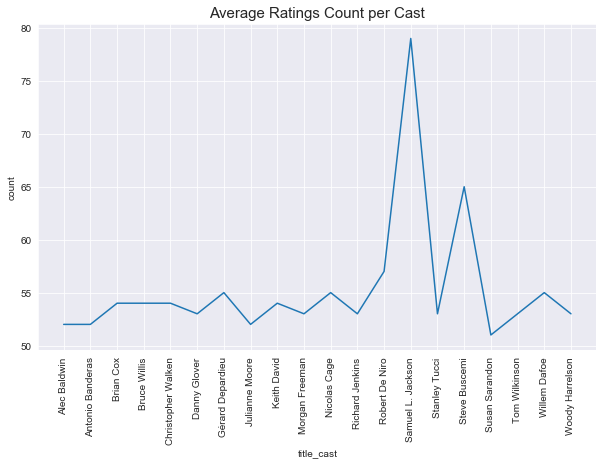

In [31]:
#Plotting cast with highest rating using line-plot
plt.figure(figsize=(10,6))
ax=sns.lineplot(x="title_cast", y="count", data=data.head(20))
ax.set_title('Average Ratings Count per Cast',fontsize=15)
plt.xticks(rotation=90)
plt.show()

**Observation**: Samuel L. Jackson had the highest avarage rating and total ratings

## 7.12. Average Runtime per Genre<a id="average_runtime_per_genre"></a>

In [32]:
#Create variable "runtime_genre"
runtime_genre=movies_imdb_df[['genres','runtime']].explode('genres')

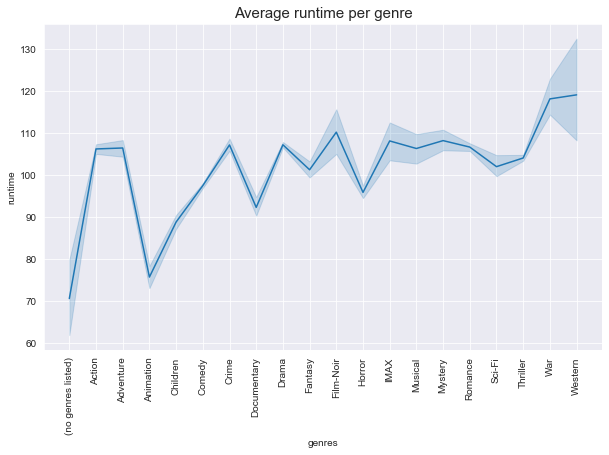

In [33]:
#Plotting an average runtime per genre using line-plot
plt.figure(figsize=(10,6))
ax=sns.lineplot(x="genres", y="runtime", data=runtime_genre)
ax.set_title('Average runtime per genre',fontsize=15)
plt.xticks(rotation=90)
plt.show()

## 7.13. Average Budget per Genre<a id="average_budget_per_genre"></a>

In [34]:
#Create variable "budget_genre"
budget_genre=movies_imdb_df[['genres','budget']].explode('genres')
budget_genre['budget']=budget_genre['budget'].str.replace(',', "").str.extract('(\d+)', expand=False).astype('float')

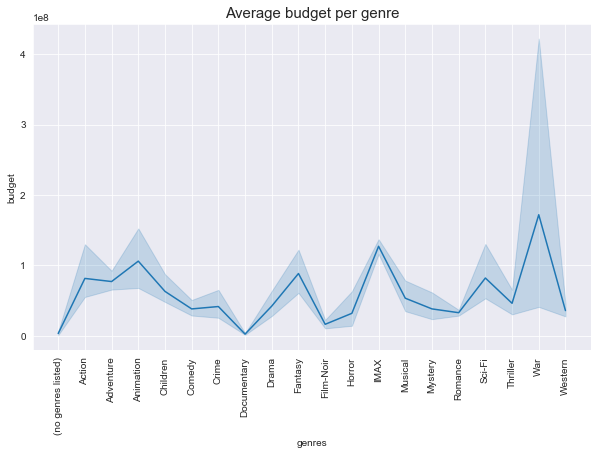

In [35]:
#Plotting an average budget per genre using line-plot
plt.figure(figsize=(10,6))
ax=sns.lineplot(x="genres", y="budget", data=budget_genre)
ax.set_title('Average budget per genre',fontsize=15)
plt.xticks(rotation=90)
plt.show()

## 7.14. Average Rating per Genre Over the Years<a id="rating_per_genre_oty"></a>

In [36]:
#Function to generate Top-rated genres
def top_genres(genre_list=[]):
    
    """
    Returns a list of top rated genres from the year 2009.

    Parameter
    ---------
    genre_list(list): List of Genres that we want to show.
    
    Return
    -------
    genre_rating_year(DataFrame): a dataframe showing top rated genres.
    
    """
    top_genres=genre_list
    genre_rating_year=movies_df[['genres','release_year','rating']].explode('genres')
    genre_rating_year=genre_rating_year.groupby(['genres', 'release_year'], as_index=False)['rating'].aggregate(np.mean)
    genre_rating_year=genre_rating_year[genre_rating_year['release_year'].str.isnumeric()]
    genre_rating_year=genre_rating_year[genre_rating_year['release_year']>'2009']
    genre_rating_year=genre_rating_year[genre_rating_year['genres'].isin(top_genres)]
    
    return genre_rating_year

In [37]:
#Show the implemetation
genre_data=top_genres(['Drama','Comedy','Thriller','Romance','Action'])
genre_data.head()

,genres,release_year,rating
491,Action,2010,3.666667
492,Action,2011,3.510684
493,Action,2012,3.504673
494,Action,2013,3.536036
495,Action,2014,3.501953


In [38]:
#Plotting top rated genres over the years
fig = px.line(genre_data, x="release_year", y="rating", color='genres')
# Edit the layout
fig.update_layout(title='Average rating per genre over years')
fig.show()

# <a id="1">8. Feature Engineering</a><a id="feature_engineering"></a>

## 8.1. Vectorization<a id="vectorization"></a>

In order to process text data using our models, it needs to be converted into numerical features. Depending upon the usage, text features can be constructed using assorted techniques such as Bag-of-Words, Term Frequency–Inverse Document Frequency (TF-IDF) and Word Embedding. For this project, only TF-IDF will be used. Vectorisers take text and convert it into a matrix of vectors.

In [39]:
#create a vectorizer
Vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
#sample of 20 000  genres from movies data
sample_genre=movies_df['genres'].head(20000).agg(lambda x: ','.join(map(str, x))) 
#fit transform the sample_genre
genre_vector = Vectorizer.fit_transform(sample_genre)
#show the shape "genre_vector"
genre_vector.shape

(20000, 187)

## 8.2. Measuring Similarity<a id="similarity"></a>

If you had the points (5, 2) and (8, 6) and were asked to tell how far apart are these two points, there are multiple answers you could give. The most common approach would be to calculate the Euclidean distance (corresponding to the length of the straight-line path connecting these two points) and say they are 5 units apart. An alternative approach would be to calculate the Manhattan distance and say they are 7 units apart.

When we compute similarity, we are going to calculate it as a measure of “anti-distance”. The higher the distance between two objects, the more “farther apart” they are. On the other hand, the higher the similarity between two objects, the more “closer together” they are. Usually, similarity metrics return a value between 0 and 1, where 0 signifies no similarity (entirely dissimilar) and 1 signifies total similarity (they are the same). We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between the two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Given two vectors of attributes, A and B, the cosine similarity, cos(θ), is represented using a dot product and magnitude as:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/1d94e5903f7936d3c131e040ef2c51b473dd071d" style="width: 350px;"/>


Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

In [40]:
#Create variable "similarity"
similarity = linear_kernel(genre_vector, genre_vector)

# <a id="1">9. Recommenders</a><a id="recommenders"></a>

## 9.1. Content Filtering-Based Recommender System<a id="content_based"></a>

The Content-Based Recommender relies on the similarity of the items being recommended. The basic idea is that if you like an item, then you will also like a “similar” item. It generally works well when it's easy to determine the context/properties of each item.

A content-based recommender works with data that the user provides, either explicitly movie ratings for the MovieLens dataset. Based on that data, a user profile is generated, which is then used to make suggestions to the user. As the user provides more inputs or takes actions on the recommendations, the engine becomes more and more accurate.

<img src="https://miro.medium.com/max/1026/1*BME1JjIlBEAI9BV5pOO5Mg.png" style="width: 250px;"/>

Below will be a function that returns **Top 10** movie recommendations based on movie tile using the cosine similarity

In [41]:
#Function to generate Top 10 recommended movies
def recommend(movie_title):
    """
    Returns top 10 recommended movies based on movie title
    
    Parameter
    ---------
    movie_title(str): a string title of a movie.
    
    Return
    ------
    recommended_movies(str): list of recommeded movies.
    
    """
    #Get movie index and make title to be the new index
    movie_index=pd.Series(movies_df.index,index=movies_df['title'])
    
    #get similarities between given title and movie index based on genre
    similarities=list(enumerate(similarity[movie_index[movie_title]]))
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)[1:11]
    recommended_movies=movies_df['title'].iloc[[i[0] for i in similarities]]
    
    return recommended_movies

In [42]:
recommend('Jumanji (1995)')

59                     Indian in the Cupboard, The (1995)
124                     NeverEnding Story III, The (1994)
986                       Escape to Witch Mountain (1975)
1954            Darby O'Gill and the Little People (1959)
2003                                  Return to Oz (1985)
2071                        NeverEnding Story, The (1984)
2072    NeverEnding Story II: The Next Chapter, The (1...
2308                        Santa Claus: The Movie (1985)
4790    Harry Potter and the Sorcerer's Stone (a.k.a. ...
9557                            Magic in the Water (1995)
Name: title, dtype: object

## 9.2. Collaborative Filtering-Based Recommender System<a id="collaborative_based"></a>


The idea behind collaborative filtering is to recommend new items based on the similarity of users. For each user, recommender systems recommend items based on how similar users liked the item. Let’s say **Alice** and **Bob** have similar interests in video games. Alice recently played and enjoyed the **game Legend of Zelda**: Breathe of the Wild. Bob has not played this game, but because the system has learned that **Alice** and **Bob** have similar tastes, it recommends this game to Bob. In addition to user similarity, recommender systems can also perform collaborative filtering using item similarity (“Users who liked this item also liked X”).


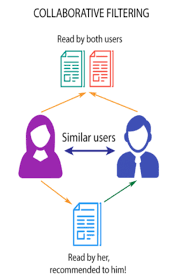


### Model-based Collaborative Filtering

---
**SVD**: SVD algorithm is equivalent to Probabilistic Matrix Factorization. SVD finds the matrix ˆR = UT V of the given rank which minimizes
the sum-squared distance to the target matrix R.

---

**SVDpp** :The SVDpp algorithm is an extension of SVD that takes into account implicit ratings.

---
**SlopeOne**:Slope One Collaborative Rating-based collaborative filtering is the process of predicting how a user would rate a given item from other user ratings. We propose three related slopes one schemes with predictors of the form f(x) = x + b, which precompute the average difference between the ratings of one item and another for users who rated both.

---
**KNNBaseline**: KNNBaseline is a basic collaborative filtering algorithm taking into account a baseline rating.

---
**KNNWithMeans**: KNNWithMeans is basic collaborative filtering algorithm, taking into account the mean ratings of each user.

---
**KNNWithZScore**: KNNWithZScore is a basic collaborative filtering algorithm, taking into account the z-score normalization of each user.

---
**BaselineOnly**: BaselineOnly algorithm predicts the baseline estimate for a given user and item.

In [43]:
#Implement an algorithm
algorithms = [SVD(), SVDpp(), SlopeOne(),  KNNBaseline(),KNNWithMeans(), KNNWithZScore(), BaselineOnly()]

Below we will only take a sample of 20000 from our train_df in order to cross validate how our model wills perform

In [44]:
#Read 20000 dataset
data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']].head(20000), Reader())

In [45]:
#Implementing algorithm for RMSE
algo_rmse=[]
for algorithm in algorithms:
    
    cross_valid=cross_validate(algorithm, data, measures=['RMSE'], cv = 3)
    output=pd.DataFrame.from_dict(cross_valid).mean(axis=0)
    output=output.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    algo_rmse.append(output)

algo_rmse
surprise_results = pd.DataFrame(algo_rmse).set_index('Algorithm').sort_values('test_rmse')
surprise_results

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,1.027029,9.246587,0.335463
SVD,1.027441,3.993253,0.224257
KNNBaseline,1.028749,11.473318,0.331628
BaselineOnly,1.029060,0.404372,0.319987
SlopeOne,1.113384,2.443426,0.213271
KNNWithMeans,1.114032,12.527001,0.238185
KNNWithZScore,1.114113,16.398407,0.421618


**Observation** : SVD has the better rmse,fit_time and test_time. So we will use it to predict the user rating on train_df

The Below code will be used to display the results of the RMSE , Testtime and Fittime

In [46]:
def display_results(df):
    """
    Displays the RMSE, Runtime and Testtime  of our models.
    
    Parameters
    ----------
    df(DataFrame): input DataFrame with model results
    
    Return
    ------
    Subplot(s) display of  RMSE, Runtime and Testtime
    
    """
    fig, axes = plt.subplots(nrows=1, ncols=2)
    df['test_rmse'].plot(figsize=(12,5),style='.-',ax=axes[1])
    df[['fit_time','test_time']].plot.bar(figsize=(12,5),style='.-',ax=axes[0])
    for index, value in enumerate(df['test_rmse']):
        plt.text(index, value, str(round(value,4)),rotation=45) 
    plt.xticks(rotation=90)
    axes[0].set_title('Fit time vs Test time',fontsize=15)
    axes[1].set_title('RMSE for Models',fontsize=15)
    axes[0].set_ylabel('Time in seconds')
    axes[1].set_ylabel('RMSE')
    plt.show()


### Predicting with SVD

In [47]:
#Loading data
data2 = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], Reader()) 

In [48]:
#SVD model
svd=SVD(n_factors = 11,n_epochs=60) 

In [49]:
#Building a trainset from the loaded data
train_set=data2.build_full_trainset() 

In [50]:
#Fitting our model  
svd.fit(train_set) 

Below we are now predicting the rating for each user and movie

In [51]:
ratings=[]
for x,y in test_df.itertuples(index=False):
    output=svd.predict(x,y)
    ratings.append(output)
    
output_df=pd.DataFrame(ratings)[['uid','iid','est']]
output_df['ID']=output_df['uid'].astype(str) + '_' + output_df['iid'].astype(str)
output_df=output_df[['ID','est']]
output_df.head()

,ID,est
0,1_2011,2.916092
1,1_4144,4.155587
2,1_5767,3.682821
3,1_6711,4.166120
4,1_7318,2.674623


The below function will recommend movies based on the user ID

In [52]:
def recommend_movies_user(userID,n):
    """
    Return top n recommended movies for user.
    
    Parameters
    ----------
    userID(int): input any of User ID.
    n(int): Number of movies that we want to recommend.
    
    Return
    ------
    recommended_movies(list): list of top n for recommended movies. 
    """

    #The below code is for storing user ID's and suggested movies movies in a dictionary
    output=defaultdict(list)
    for uid, iid, r_ui, est, _ in ratings:
        output[uid].append((iid,est))
    
    #The below code sorts the recommended movies n number of movies according to rating.
    for uid,rating in output.items():
        rating.sort(key=lambda x: x[1], reverse = True)
        output[uid] = rating[:n]
        
    
    #The below code Returns the suggested movies with movie names from the movies Data.   
    for uid,rating in output.items():
        if uid==userID:
            recommended_movies= [movies_df.query('movieId=='+str(i)).title.values for i in [iid for (iid, _) in rating]]
            
            recommended_movies=pd.DataFrame(recommended_movies,columns=['Suggested Movies'])
            

    return recommended_movies

In [53]:
recommend_movies_user(525,5)

,Suggested Movies
0,Sense and Sensibility (1995)
1,Jane Eyre (1996)
2,Sleepers (1996)
3,Girl 6 (1996)
4,Mission: Impossible (1996)


# <a id="1">10. Submission</a><a id="submission"></a>

In [54]:
#Creating the "results" dataframe and convert to csv
results = pd.DataFrame({"ID":output_df['ID'],"rating": output_df['est']})
results.to_csv("SVDv1.csv", index=False)

# <a id="1">11. Conclusion</a><a id="conclusion"></a>

**Analysis :** The analysis on the movieLens dataset produced some interesting insights. Those insights is that users liked watching 
**Shawshank Redemption, The (1994)** which was based on Stephen King novella and also users prefered watching movies with **drama** as genre . Another key aspect that we realised is that users prefer movies with **Samuel L Jackson** as a leading cast which is why any movie with Samuel L Jackson receives a higher rating.

---
**Content Based Filtering :** From the analysis above we built a content based filtering which we took meta data such as genres and used cosine similarity to predict similar movies based on the input of movie title.

---
**Collaborative Based Filtering :** We used Surprise Libraries such as SVD, SVDpp, SlopeOne,  KNNBaseline,KNNWithMeans, KNNWithZScore and BaselineOnly. We only tested a sample of 20000 and realised that the best performing model was SVDpp as shown below.

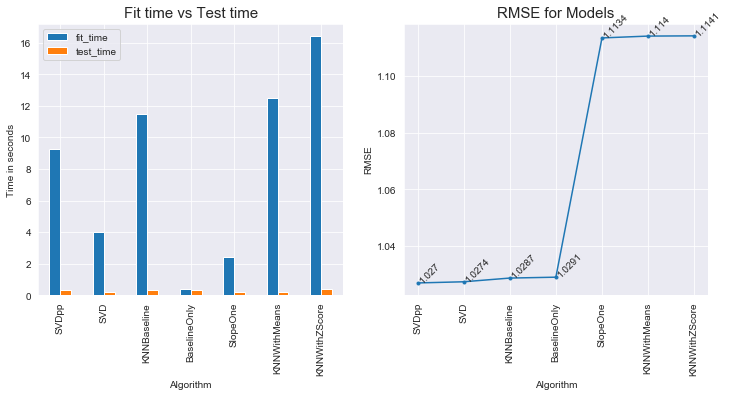

In [55]:
 display_results(surprise_results)

But due to the fact that SVDpp has higher run time , we decided to use the SVD for collaborative system to make a prediction on user rating since we realised that on the sample we have an RMSE of 1.0274 and  when we used the whole dataset, we achieved as score of 0.809 on kaggle  using the SVD algorithmn from Surprise Library which we realised that it was good for us to use on collaborative filtering

# <a id="1">12. End Comet Experiment</a><a id="ecomet"></a>

In [56]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/team-ts5-jhb/unsupervised-learning-predict/1fee01dc2d0a4c2fa5d218782e01c77a
COMET INFO:   Uploads:
COMET INFO:     code                : 1 (18 KB)
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO: ---------------------------
COMET INFO: Uploading stats to Comet before program termination (may take several seconds)
COMET INFO: Waiting for completion of the file uploads (may take several seconds)
COMET INFO: Still uploading


In [57]:
experiment.display()

# <a id="1">13. References</a><a id="ref"></a>

https://towardsdatascience.com/introduction-to-recommender-systems-6c66cf15ada

http://surpriselib.com/

